In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
# Improt MNIST data
from tensorflow.examples.tutorials.mnist import input_data




## Update step 
The update step for the simple vanilla RNN
$$h_t = \tanh(W_xX_t + W_hh_(t-1) + b)$$
Where $W_h$, $W_x$ and $b$ are weight and bias variables we learn, $\tanh(.)$ is the hyperbolic tangent function that has its range in [-1,1].
$$ \tanh(z) = \frac{\sinh(z)}{\cosh(z)} =\frac{e^z - e^{-z}}{e^z + e^{-z}} $$

The graph of hyperbolic tangent function will look like below.

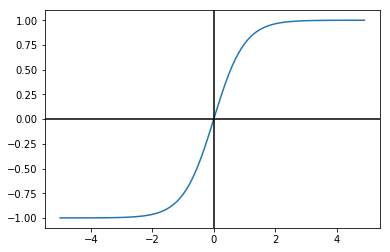

In [2]:
z = np.arange(-5,5,0.1)
plt.plot(z, np.tanh(z))
plt.axvline(0,color='k', lineStyle='solid')
plt.axhline(0, color='k', lineStyle='solid')
plt.show()

In [ ]:
mnist = input_data.read_data_sets("./data/", one_hot=True)

# Define some parameters.
element_size = 28 # the dimension of each vector in the sequence.
time_steps = 28 # the number of such element in a sequence.
num_classes = 10
batch_size = 128
hidden_layer_size = 128

# Where to save TensorBoard model summaries
LOG_DIR = "./logs/RNN_with_summaries"

# Create placeholders for inputs, labels
_inputs = tf.placeholder(tf.float32, shape=[None, time_steps, 
                                            element_size],name="inputs")

y = tf.placeholder(tf.float32, shape=[None,num_classes], name="labels")

batch_x, batch_y = mnist.train.next_batch(batch_size)
# Reshape data to get 28 sequences of 28 pixels.
batch_x = batch_x.reshape((batch_size, time_steps, element_size))

# Create a function used for logging summaries.
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var -mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histgram', var)

# Weights and bias for input and hidden layer.
with tf.name_scope('rnn_weights'):
    with tf.name_scope("W_x"):
        Wx = tf.Variable(tf.zeros([element_size,hidden_layer_size]))
        variable_summaries(Wx)
    with tf.name_scope("W_h"):
        Wh = tf.Variable(tf.zeros([hidden_layer_size,hidden_layer_size]))
        variable_summaries(Wh)
    with tf.name_scope("Bias"):
        b_rnn = tf.Variable(tf.zeros([hidden_layer_size]))
        variable_summaries(b_rnn)
        
# Define the RNN step with tf.scan()
def rnn_step(previous_hidden_state, x):
    current_hidden_state = tf.tanh(
    tf.matmul(previous_hidden_state, Wh)+ tf.matmul(x, Wx) + b_rnn)
    return current_hidden_state
# Processing inputs to work with scan function
# Current input shape: (batch_size, time_steps, element_size)
processed_input = tf.transpose(_inputs, perm=[1,0,2])
# Current input shape now: (time_steps, batch_size, element_size)

initial_hidden = tf.zeros([batch_size, hidden_layer_size])
# Getting all state vectors across time
all_hidden_states = tf.scan(rnn_step, processed_input, 
                            initializer=initial_hidden,
                           name='states')



### Sequential outputs

In [ ]:
# Weights for output layers.
with tf.name_scope('linear_layer_weights') as scope:
    with tf.name_scope('W_linear'):
        